# Stochastic gradient method: stepsize and epochs

In [104]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Suppose we want to minimize a sum of quadratics
$$f(x) = \frac{1}{n} \sum_i 1/2 (x - y_i)^2$$
using the stochastic gradient method. We start by generating a random problem instance, and defining the cost function:


In [105]:
n = 500
y = np.random.randn(n)
def f(x):
	return np.linalg.norm( y - x )**2


An optimal solution is:

In [107]:
xopt = sum(y)/n

Now let's define the SGM:

In [118]:
def SGD(alpha,numit,T,gamma=1):
    stepsize = alpha
    xk = 0.3 # so we always start from the same point
    dist = []
    for it in range(numit):
        if it % T == 0:
            print(stepsize)
            stepsize = stepsize*gamma
        if gamma>1:
            stepsize = 1.0/(it+1)
        i = np.random.choice(range(n))
        xk = xk - stepsize*(xk - y[i])
        tmpdist = f(xk) - f(xopt)
        if tmpdist >= 10**(-15): # machine precision
            dist.append(np.log(tmpdist))
        else:
            print("essentially optimal or error")
    return dist

SGD with constant stepsize:

5e-05


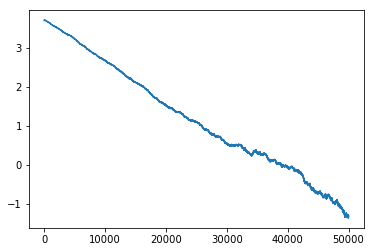

In [109]:
alpha = 0.00005
numit = 100*n
dist = SGD(alpha,numit,numit)
plt.plot(dist)
plt.show()

Larger stepsize:

0.001


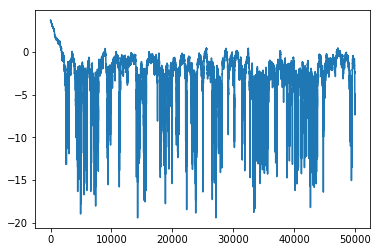

In [110]:
alpha = 0.001
numit = 100*n
dist = SGD(alpha,numit,numit)
plt.plot(dist)
plt.show()

Epochs:

0.001
0.0005
0.00025
0.000125
6.25e-05
3.125e-05
1.5625e-05
7.8125e-06
3.90625e-06
1.953125e-06


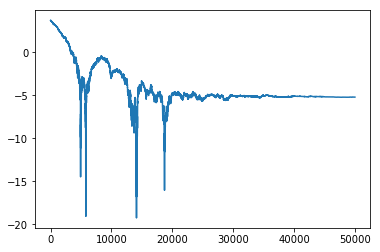

In [111]:
alpha = 0.001
numit = 100*n
dist = SGD(alpha,numit,numit/10,0.5)
plt.plot(dist)
plt.show()

Decaying stepsize:

0.001
0.0004
0.0002
0.00013333333333333334
0.0001
8e-05
6.666666666666667e-05
5.714285714285714e-05
5e-05
4.4444444444444447e-05


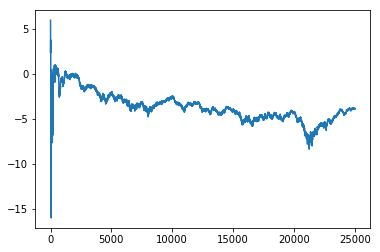

In [119]:
alpha = 0.001
numit = 50*n
dist = SGD(alpha,numit,numit/10,2)
plt.plot(dist)
plt.show()